In [1]:
# https://www.kaggle.com/datasets/adilshamim8/predict-calorie-expenditure
import pandas as pd
import numpy as np

def get_data(file_path, sex_to_include="male"):
    with open(file_path) as file:
        csvFile = pd.read_csv(file)
        df = pd.DataFrame(csvFile)
        sex = df["Sex"]    
        age = df["Age"]
        height = df["Height"]
        weight = df["Weight"]
        duration = df["Duration"]
        heart_rate = df["Heart_Rate"]
        body_temp = df["Body_Temp"]
        calories = df["Calories"]
    
    # include_sex = sex_to_include == "male" or sex_to_include == "female"

    x = []
    y = []
    for i in range(len(calories)):
        if not sex[i] == sex_to_include:
            continue
        data_to_append = [age[i], height[i], weight[i], duration[i], heart_rate[i], body_temp[i]]
        # if include_sex:
        #     data_to_append.append(sex[i])
        x.append(data_to_append)
        y.append(calories[i])

    return np.array(x), np.array(y)

In [2]:
import numpy as np
import matplotlib.pyplot as plt



class Predictor:
    """
    I made this to translate between non-normalized queries, using a normalized model.
    """
    def __init__(self, X: list, y: list, classifier):
        X = np.array(X)
        X_normalized = self.normalize_training_data(X)
        
        self.classifier = classifier
        self.classifier.fit(X_normalized, y)
    
    def normalize_training_data(self, X):
        X = np.array(X)
        num_feature_types = X.shape[1]
        new_X = np.zeros_like(X)
        min_max_values = np.zeros((X.shape[1], 2))

        for i in range(num_feature_types):
            new_X[:, i] = (X[:, i] - np.min(X[:, i])) / (np.max(X[:, i]) - np.min(X[:, i]))
            min_max_values[i, 0] = np.min(X[:, i])
            min_max_values[i, 1] = np.max(X[:, i])
        
        self.min_max_training_values = min_max_values

        return new_X
    
    def normalize_test_data(self, X):
        X = np.array(X)
        num_feature_types = X.shape[1]
        new_X = np.zeros_like(X)

        for i in range(num_feature_types):
            new_X[:, i] = (X[:, i] - self.min_max_training_values[i, 0]) / (self.min_max_training_values[i, 1] - self.min_max_training_values[i, 0])
        
        return new_X

    def predict(self, X):
        X_normalized = self.normalize_test_data(X)
        return self.classifier.predict(X_normalized)

In [3]:
import matplotlib.pyplot as plt

male_x, male_y = get_data("archive/train.csv", "male")
female_x, female_y = get_data("archive/train.csv", "female")

In [4]:
from sklearn.model_selection import train_test_split

male_x, male_x_test, male_y, male_y_test = train_test_split(male_x, male_y ,test_size=0.9)

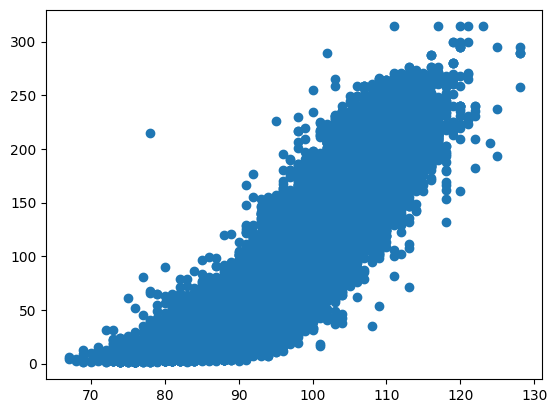

In [5]:
plt.scatter(male_x[:, 4], male_y[:])

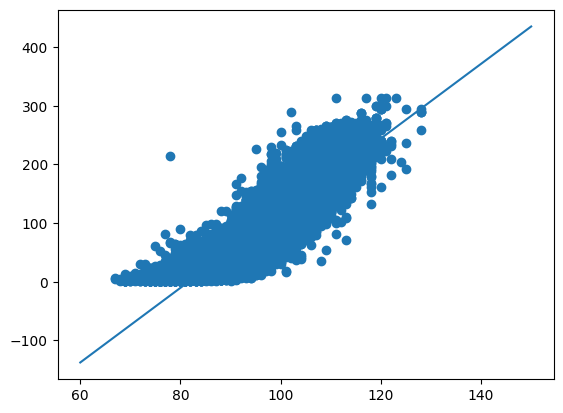

In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression

x_1d = np.array([[x] for x in male_x[:, 4]])

regressor_1d = LinearRegression()
predictor_1d = Predictor(x_1d, male_y, regressor_1d)

_x = [[x] for x in np.linspace(60, 150, 1000)]

# plt.scatter(male_x[:, 3], male_y[:])
plt.scatter(male_x[:, 4], male_y[:])
plt.plot(_x, predictor_1d.predict(_x))

In [7]:


x_2d = np.array([[x[4], x[3]] for x in male_x])

regressor_2d = LinearRegression()
predictor_2d = Predictor(x_2d, male_y, regressor_2d)

In [8]:
@np.vectorize
def calculate_z(x1, x2):
    return predictor_2d.predict([[x1, x2]])[0]

In [9]:
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# y_hat = calculate_y_hat(x_data, theta_hat1)

# ax.scatter(x_data[:, 0], x_data[:, 0], y_data)


# x = np.linspace(10, 90, 100)
x = np.linspace(60, 130, 100)
y = np.linspace(0, 35, 100)
X, Y = np.meshgrid(x, y)
Z = calculate_z(X, Y)


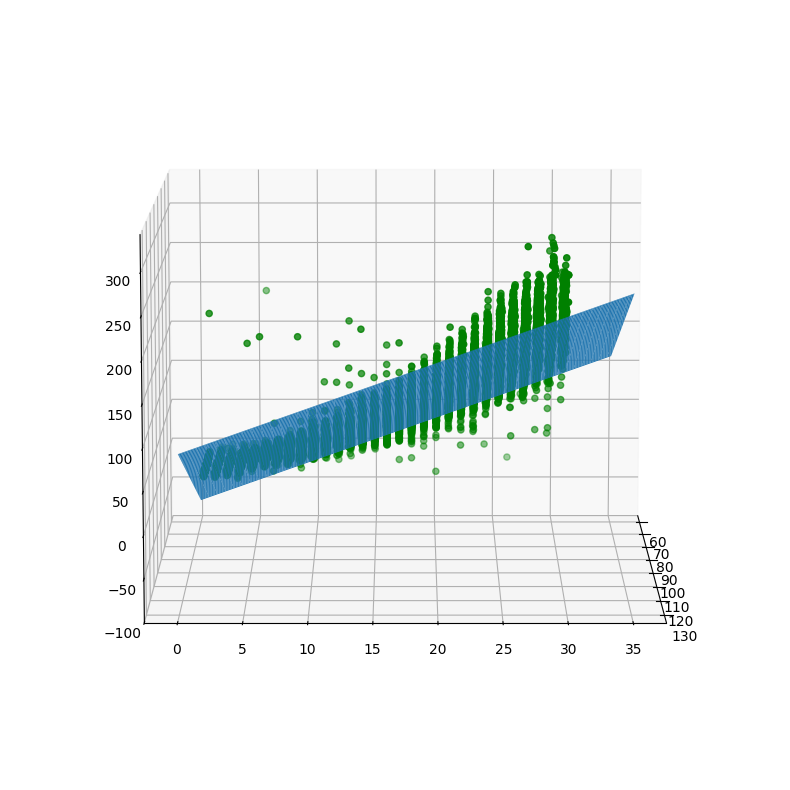

In [10]:
fig = plt.figure(figsize=[10,10])
ax = plt.axes(projection='3d')
# ax.set_xlim([150, 0])
ax.plot_surface(X, Y, Z)
ax.scatter(x_2d[:,0], x_2d[:,1], male_y, color="g")

ax.view_init(10, -45 + 45, 0)
plt.show()

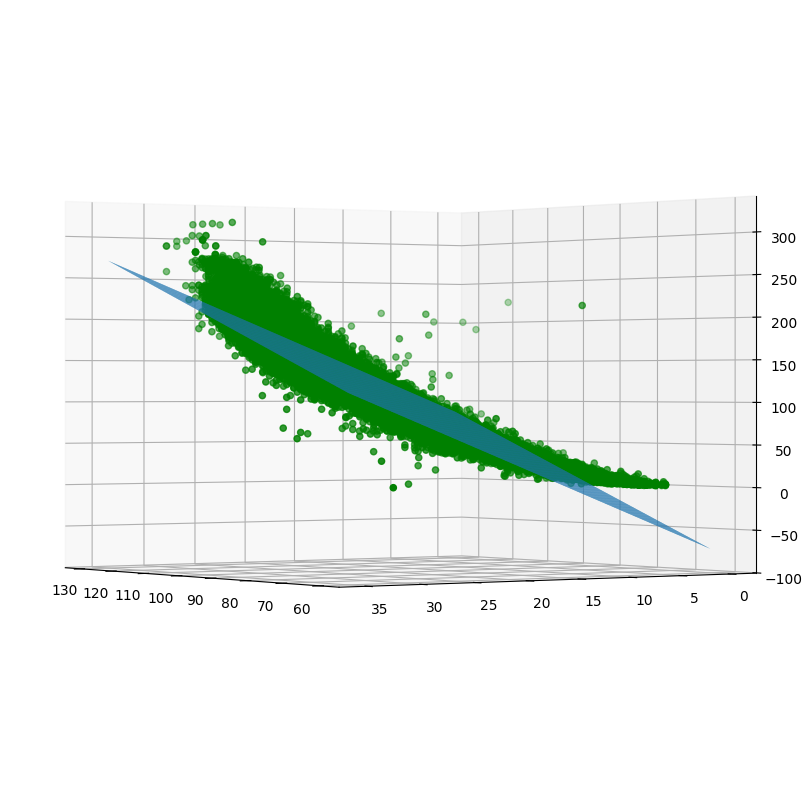

In [11]:
fig = plt.figure(figsize=[10,10])
ax = plt.axes(projection='3d')
# ax.set_xlim([150, 0])
ax.plot_surface(X, Y, Z)
ax.scatter(x_2d[:,0], x_2d[:,1], male_y, color="g")
# ax.scatter(X.ravel(),Y.ravel(), Z.ravel())

# ax.set_ylim([35, 0])
# plt.scatter(x_data[:, 0], x_data[:, 0], y_hat)
# ax.view_init(10, 7*45, 0)
ax.view_init(0, 7*45 + 180 + 10, 0)
plt.show()

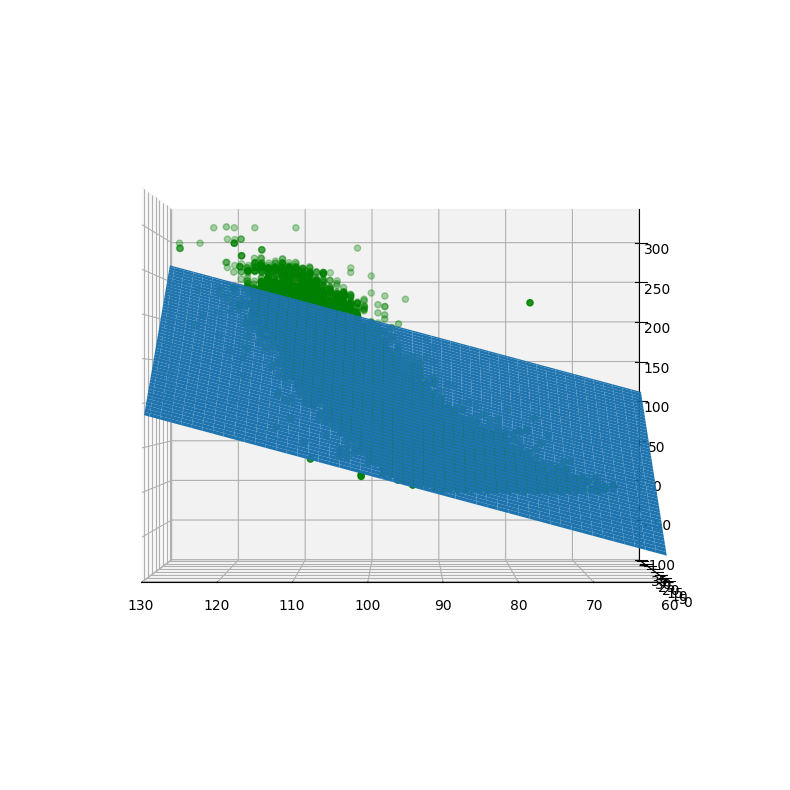

In [12]:
fig = plt.figure(figsize=[10, 10])
ax = plt.axes(projection='3d')
ax.set_xlim([130, 60])
ax.plot_surface(X, Y, Z)
ax.scatter(x_2d[:,0], x_2d[:,1], male_y, color="g")
# ax.scatter(X.ravel(),Y.ravel(), Z.ravel())

# plt.scatter(x_data[:, 0], x_data[:, 0], y_hat)
ax.view_init(0, -90, 0)
plt.show()

In [13]:
ax.view_init()